<a href="https://colab.research.google.com/github/Chathalaswapna/TaskFailurePrediction/blob/main/majorfinalproject1504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:
train_df=pd.read_csv('/content/train_data.csv')
train_df

,job_id,memory_GB,network_log10_MBps,local_IO_log10_MBps,NFS_IO_log10_MBps,failed
0,jobID1634295,44.3904,-1.0262,0.8033,-3.0000,0
1,jobID2033452,31.5839,-1.4608,-0.6080,-2.9967,0
2,jobID2068800,154.4610,-0.5508,-0.3637,-3.0000,0
3,jobID78826,71.8570,3.5701,-0.1281,2.3040,0
4,jobID2935014,30.0370,3.3094,-0.9463,-3.0000,0
...,...,...,...,...,...,...
19995,jobID3638409,62.2909,-1.3317,0.8725,-2.9175,0
19996,jobID1716406,19.8377,3.1328,-0.2947,-3.0000,0
19997,jobID360445,22.1773,3.5185,-0.4147,-3.0000,0
19998,jobID335571,14.8184,2.7831,-1.0320,0.8747,0


In [ ]:
# print(train_df.to_string())

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               20000 non-null  object 
 1   memory_GB            20000 non-null  float64
 2   network_log10_MBps   20000 non-null  float64
 3   local_IO_log10_MBps  20000 non-null  float64
 4   NFS_IO_log10_MBps    20000 non-null  float64
 5   failed               20000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
print(train_df.shape)

(20000, 6)


In [ ]:
print(train_df)

             job_id  memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0      jobID1634295    44.3904             -1.0262               0.8033   
1      jobID2033452    31.5839             -1.4608              -0.6080   
2      jobID2068800   154.4610             -0.5508              -0.3637   
3        jobID78826    71.8570              3.5701              -0.1281   
4      jobID2935014    30.0370              3.3094              -0.9463   
...             ...        ...                 ...                  ...   
19995  jobID3638409    62.2909             -1.3317               0.8725   
19996  jobID1716406    19.8377              3.1328              -0.2947   
19997   jobID360445    22.1773              3.5185              -0.4147   
19998   jobID335571    14.8184              2.7831              -1.0320   
19999  jobID1165709     7.9835              0.7225              -1.1583   

       NFS_IO_log10_MBps  failed  
0                -3.0000       0  
1                -2.9967     

In [ ]:
# X = train_df.iloc[:, 1:5]
# y = train_df.iloc[:,5]
# print(y)
# print(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = train_df.iloc[:, 1:5]
y = train_df.iloc[:, 5]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose number of components as per requirement
X_pca = pca.fit_transform(X_scaled)

# Concatenate the PCA components with target variable
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Target'] = y.values

# Now pca_df contains the transformed features ready for modeling
print(pca_df.head())

       PCA1      PCA2  Target
0  2.054255  0.318135       0
1  0.944595 -0.732467       0
2  1.304136  2.177581       0
3 -1.676341  2.126822       0
4 -1.045299 -0.152905       0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your feature data and y contains the target variable
rf = RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=5)  # Select top 5 features
X_selected = rfe.fit_transform(X, y)
print(X_selected)

[[ 44.3904  -1.0262   0.8033  -3.    ]
 [ 31.5839  -1.4608  -0.608   -2.9967]
 [154.461   -0.5508  -0.3637  -3.    ]
 ...
 [ 22.1773   3.5185  -0.4147  -3.    ]
 [ 14.8184   2.7831  -1.032    0.8747]
 [  7.9835   0.7225  -1.1583   0.2308]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X contains your feature data
poly = PolynomialFeatures(degree=2)  # Create polynomial features up to degree 2
X_poly = poly.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(15000, 4, 1)
(5000, 4, 1)


In [ ]:
from keras.utils import to_categorical

In [ ]:
target_train = y_train
target_test = y_test
Y_train=to_categorical(target_train)
Y_test=to_categorical(target_test)

In [ ]:
!pip show tensorflow
import tensorflow as tf

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(100, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(rate=0.2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted')
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)

In [ ]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():

    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 128)            384       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
2/2 [==============================] - 2s 576ms/step - loss: 0.1915 - accuracy: 0.9531 - val_loss: 0.4280 - val_accuracy: 0.9163
Epoch 2/20
2/2 [==============================] - 0s 160ms/step - loss: 0.1706 - accuracy: 0.9688 - val_loss: 0.4686 - val_accuracy: 0.9163
Epoch 3/20
2/2 [==============================] - 0s 172ms/step - loss: 0.3051 - accuracy: 0.9219 - val_loss: 0.4653 - val_accuracy: 0.9163
Epoch 4/20
2/2 [==============================] - 0s 157ms/step - loss: 0.2386 - accuracy: 0.9531 - val_loss: 0.4591 - val_accuracy: 0.9163
Epoch 5/20
2/2 [==============================] - 0s 154ms/step - loss: 0.6292 - accuracy: 0.8750 - val_loss: 0.4178 - val_accuracy: 0.9163
Epoch 6/20
2/2 [==============================] - 0s 174ms/step - loss: 1.3193 - accuracy: 0.9375 - val_loss: 0.3842 - val_accuracy: 0.9163
Epoch 7/20
2/2 [==============================] - 0s 167ms/step - loss: 0.2278 - accuracy: 0.9531 - val_loss: 0.3650 - val_accuracy: 0.9163
Epoch 8/20
2/2 [====

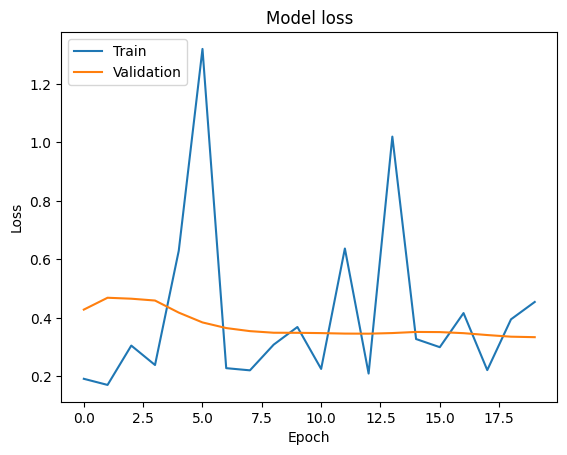

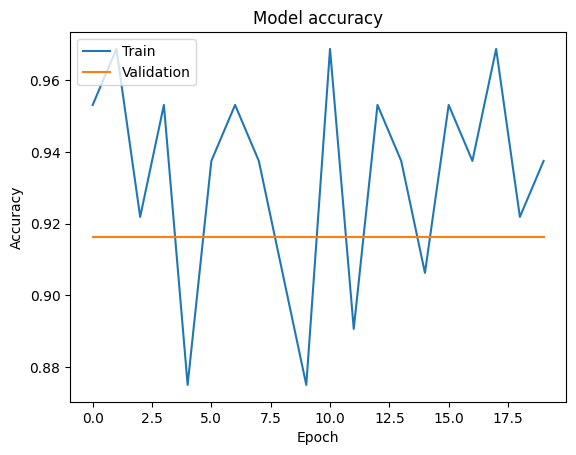

In [ ]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()
# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)

157/157 [==============================] - 1s 2ms/step


In [ ]:
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)
showResults(cnn_actual_value, cnn_predict)

Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn = accuracy_score(cnn_actual_value, cnn_predict)
f1cnn=f1_score(cnn_actual_value, cnn_predict, average='weighted')

In [ ]:
##KFOLD VALIDATION

In [ ]:
tempX=train_df.iloc[:,1:5].values
tempY=train_df.iloc[:,5].values
skf = StratifiedKFold(n_splits=3, shuffle=True)
skf.get_n_splits(X_train, target_train)
foldNum=0
for train_index, val_index in skf.split(X_train, target_train):
    foldNum+=1
    print("Results for fold",foldNum)
    X_traincv, X_valcv = tempX[train_index], tempX[val_index]
    Y_traincv, Y_valcv = tempY[train_index], tempY[val_index]

    X_traincv=X_traincv.reshape(X_traincv.shape[0],X_traincv.shape[1],1)
    X_valcv=X_valcv.reshape(X_valcv.shape[0],X_valcv.shape[1],1)
    # one hot encode
    Y_traincv = to_categorical(Y_traincv)
    Y_valcv = to_categorical(Y_valcv)

    history = cnnmodel.fit(X_traincv, Y_traincv, validation_data = (X_valcv, Y_valcv), epochs=20,steps_per_epoch=2, batch_size=batch_size)
    yPredict = cnnmodel.predict(X_valcv)

    #Converting one hot encoded test label to label
    pred = np.argmax(yPredict, axis=1)
    val = np.argmax(Y_valcv, axis=1)

    showResults(val, pred)

Results for fold 1
Epoch 1/20
2/2 [==============================] - 2s 487ms/step - loss: 0.3016 - accuracy: 0.9219 - val_loss: 0.3206 - val_accuracy: 0.9254
Epoch 2/20
2/2 [==============================] - 0s 408ms/step - loss: 0.4086 - accuracy: 0.8906 - val_loss: 0.3181 - val_accuracy: 0.9254
Epoch 3/20
2/2 [==============================] - 1s 579ms/step - loss: 0.3385 - accuracy: 0.8906 - val_loss: 0.3169 - val_accuracy: 0.9254
Epoch 4/20
2/2 [==============================] - 0s 484ms/step - loss: 0.2484 - accuracy: 0.9375 - val_loss: 0.3124 - val_accuracy: 0.9254
Epoch 5/20
2/2 [==============================] - 0s 429ms/step - loss: 0.2001 - accuracy: 0.9531 - val_loss: 0.3053 - val_accuracy: 0.9254
Epoch 6/20
2/2 [==============================] - 1s 564ms/step - loss: 0.2702 - accuracy: 0.9219 - val_loss: 0.3007 - val_accuracy: 0.9254
Epoch 7/20
2/2 [==============================] - 1s 663ms/step - loss: 0.3180 - accuracy: 0.9219 - val_loss: 0.2999 - val_accuracy: 0.9254
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 1s 957ms/step - loss: 0.3155 - accuracy: 0.9062 - val_loss: 0.2813 - val_accuracy: 0.9192
Epoch 2/20
2/2 [==============================] - 1s 1s/step - loss: 0.1323 - accuracy: 0.9844 - val_loss: 0.2859 - val_accuracy: 0.9192
Epoch 3/20
2/2 [==============================] - 1s 518ms/step - loss: 0.1366 - accuracy: 0.9688 - val_loss: 0.2993 - val_accuracy: 0.9192
Epoch 4/20
2/2 [==============================] - 1s 668ms/step - loss: 0.6363 - accuracy: 0.9375 - val_loss: 0.2963 - val_accuracy: 0.9192
Epoch 5/20
2/2 [==============================] - 1s 682ms/step - loss: 0.2801 - accuracy: 0.9219 - val_loss: 0.2939 - val_accuracy: 0.9192
Epoch 6/20
2/2 [==============================] - 0s 449ms/step - loss: 0.4199 - accuracy: 0.8906 - val_loss: 0.2864 - val_accuracy: 0.9192
Epoch 7/20
2/2 [==============================] - 1s 1s/step - loss: 0.5038 - accuracy: 0.9531 - val_loss: 0.2747 - val_accuracy: 0.9192
Epoch 8/20
2/2 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 1s 812ms/step - loss: 0.4319 - accuracy: 0.8750 - val_loss: 0.2882 - val_accuracy: 0.9150
Epoch 2/20
2/2 [==============================] - 1s 1s/step - loss: 0.1553 - accuracy: 0.9688 - val_loss: 0.2866 - val_accuracy: 0.9150
Epoch 3/20
2/2 [==============================] - 1s 784ms/step - loss: 0.2684 - accuracy: 0.9062 - val_loss: 0.2867 - val_accuracy: 0.9150
Epoch 4/20
2/2 [==============================] - 0s 480ms/step - loss: 0.4501 - accuracy: 0.8594 - val_loss: 0.2887 - val_accuracy: 0.9150
Epoch 5/20
2/2 [==============================] - 0s 376ms/step - loss: 0.3235 - accuracy: 0.9062 - val_loss: 0.2949 - val_accuracy: 0.9150
Epoch 6/20
2/2 [==============================] - 0s 416ms/step - loss: 0.3017 - accuracy: 0.9062 - val_loss: 0.2958 - val_accuracy: 0.9150
Epoch 7/20
2/2 [==============================] - 1s 670ms/step - loss: 0.2507 - accuracy: 0.9219 - val_loss: 0.2914 - val_accuracy: 0.9150
Epoch 8/20
2/2 [==================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnnpredictionscv = cnnmodel.predict(X_test, verbose=1)

157/157 [==============================] - 0s 2ms/step


In [ ]:
cnn_predictcv=np.argmax(cnnpredictionscv,axis=1)
cnn_actual_valuecv=np.argmax(Y_test,axis=1)
showResults(cnn_actual_valuecv, cnn_predictcv)


Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnnkv = accuracy_score(cnn_actual_valuecv, cnn_predictcv)
f1cnnkv=f1_score(cnn_actual_valuecv, cnn_predictcv, average='weighted')

In [ ]:
#HYBRID CNN LSTM

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             384       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 32)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 2, 128)            82432     
                                                                 
 flatten (Flatten)           (None, 256)               0

In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.1373 - acc: 0.8993
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0880 - acc: 0.9192
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0830 - acc: 0.9192
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0810 - acc: 0.9192
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0795 - acc: 0.9192
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0790 - acc: 0.9192
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0778 - acc: 0.9192
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0773 - acc: 0.9192
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0773 - acc: 0.9192
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0769 - acc: 0.9192


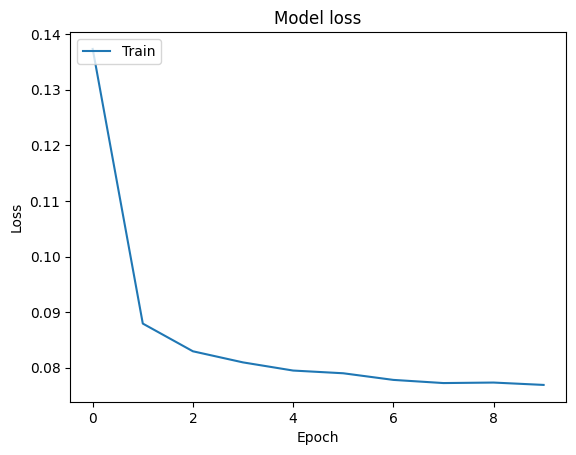

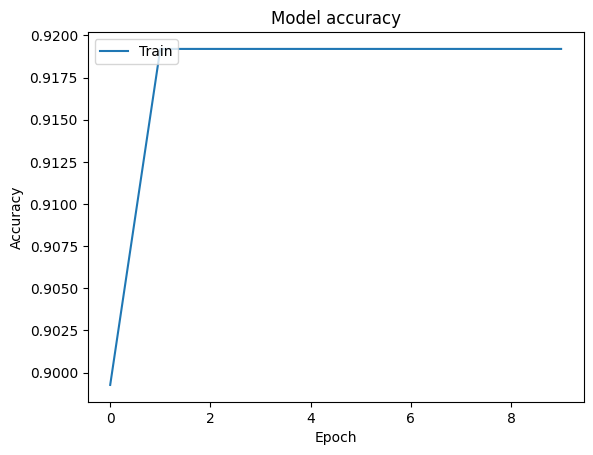

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

157/157 [==============================] - 1s 3ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
hyd = accuracy_score(actual_valuecv, predictcv)
f1hyd=f1_score(actual_valuecv, predictcv, average='weighted')

In [ ]:
#LSTM

In [ ]:
from keras.callbacks import EarlyStopping
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 13)                780       
                                                                 
 dense_3 (Dense)             (None, 2)                 28        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 808 (3.16 KB)
Trainable params: 808 (3.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.2192 - acc: 0.9192
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1905 - acc: 0.9192
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1680 - acc: 0.9192
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1504 - acc: 0.9192
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1366 - acc: 0.9192
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1256 - acc: 0.9192
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1170 - acc: 0.9192
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1101 - acc: 0.9192
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1046 - acc: 0.9192
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1001 - acc: 0.9192


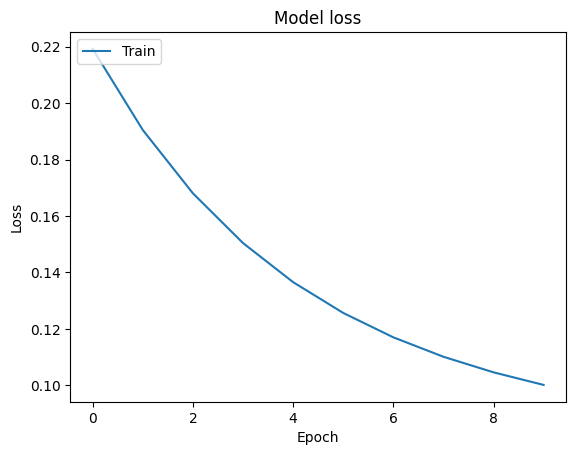

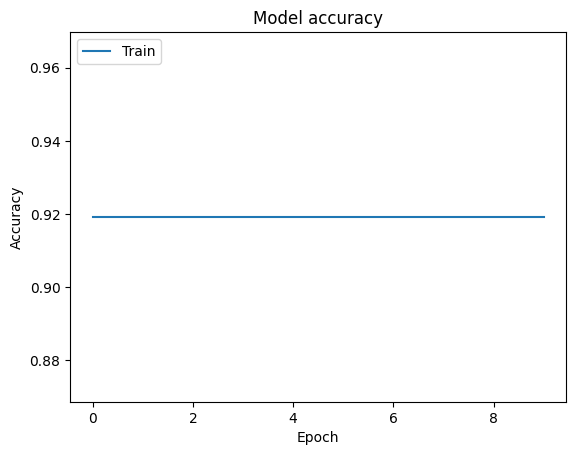

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

157/157 [==============================] - 1s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lstm = accuracy_score(actual_valuecv, predictcv)
f1lstm=f1_score(actual_valuecv, predictcv, average='weighted')

In [ ]:
#BiLSTM

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(Bidirectional(LSTM(13,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
469/469 [==============================] - 9s 5ms/step - loss: 0.2472 - acc: 0.5822
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1832 - acc: 0.9192
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1450 - acc: 0.9192
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1218 - acc: 0.9192
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1072 - acc: 0.9192
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0979 - acc: 0.9192
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0919 - acc: 0.9192
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0878 - acc: 0.9192
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0849 - acc: 0.9192
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0827 - acc: 0.9192


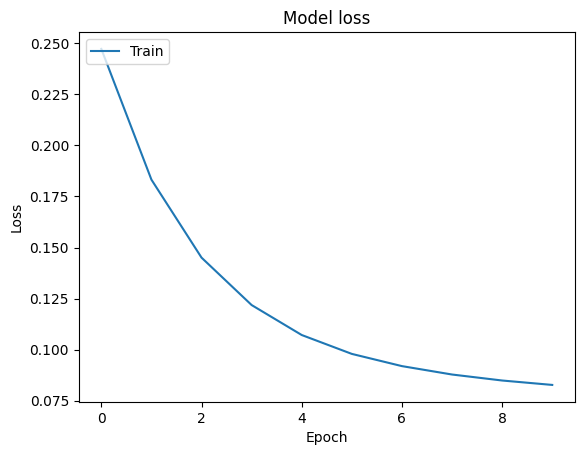

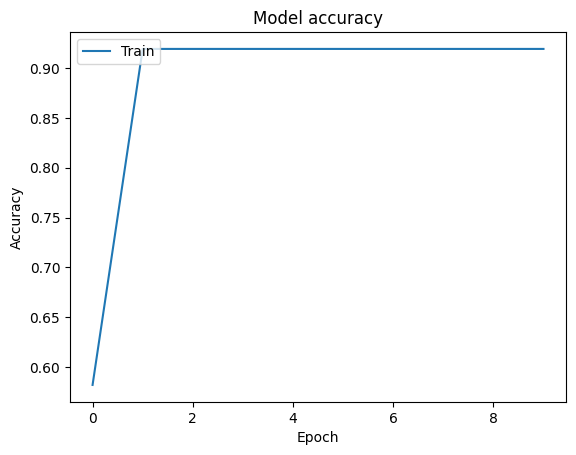

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

157/157 [==============================] - 2s 4ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
bilstm = accuracy_score(actual_valuecv, predictcv)
f1bilstm=f1_score(actual_valuecv, predictcv, average='weighted')

In [ ]:
from keras.layers import Dense, Dropout, Embedding, SimpleRNN

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(SimpleRNN(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])


In [ ]:
#RNN

In [ ]:
from keras.layers import Dense, Dropout, Embedding, SimpleRNN

In [ ]:
es=EarlyStopping(patience=7)
model=Sequential()
model.add(SimpleRNN(13,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 13)                195       
                                                                 
 dense_6 (Dense)             (None, 2)                 28        
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 223 (892.00 Byte)
Trainable params: 223 (892.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.1512 - acc: 0.9191
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1162 - acc: 0.9192
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1008 - acc: 0.9192
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0925 - acc: 0.9192
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0873 - acc: 0.9192
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0840 - acc: 0.9192
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0817 - acc: 0.9192
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0801 - acc: 0.9192
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0790 - acc: 0.9192
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0781 - acc: 0.9192


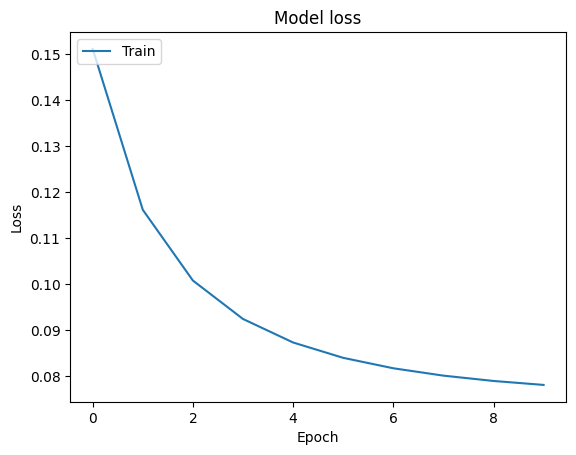

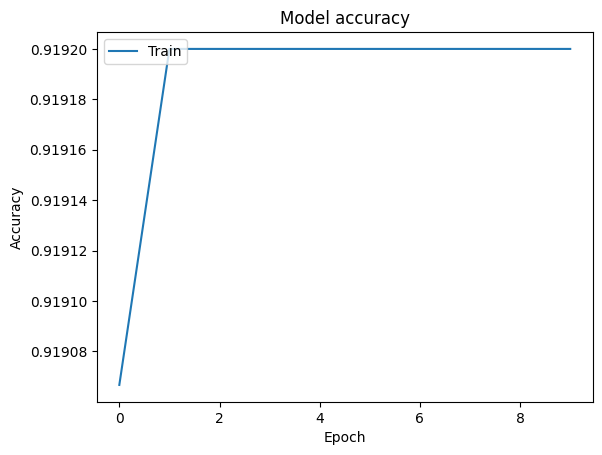

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)

157/157 [==============================] - 0s 2ms/step


In [ ]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)
showResults(actual_valuecv, predictcv)

Accuracy  : 0.9172
Precision : 0.84125584
f1Score : 0.8775879824744419
[[4586    0]
 [ 414    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rnn = accuracy_score(actual_valuecv, predictcv)
f1rnn=f1_score(actual_valuecv, predictcv, average='weighted')

In [ ]:
# For Machine Learning

In [ ]:
X = train_df.iloc[:, 1:5]
y = train_df.iloc[:,5]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
predictions = RF.predict(X)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for RF: 
[[18374     0]
 [    0  1626]]


In [ ]:
print("*Classification report for RF: ")
print(classification_report(y, predictions))

*Classification report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18374
           1       1.00      1.00      1.00      1626

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
val1 = accuracy_score(y, predictions) *100
print(val1)

100.0


In [ ]:
f1rf = f1_score(y, predictions, average='weighted')

In [ ]:
# Decision Tree

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X, y)
predictions = DT.predict(X)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for DT: 
[[18374     0]
 [    0  1626]]


In [ ]:
print("*Classification report for DT: ")
print(classification_report(y, predictions))

*Classification report for DT: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18374
           1       1.00      1.00      1.00      1626

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
val2 = accuracy_score(y, predictions) *100
print(val2)

100.0


In [ ]:
f1dt = f1_score(y, predictions, average='weighted')

In [ ]:
# Hidden Markov Model

In [ ]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
from hmmlearn.hmm import GaussianHMM
hmm = GaussianHMM(n_components=2)
hmm.fit(X)
predictions = hmm.predict(X)
print("*Confusion Matrix for HMM: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for HMM: 
[[15843  2531]
 [ 1462   164]]


In [ ]:
print("*Classification report for HMM: ")
print(classification_report(y, predictions))

*Classification report for HMM: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     18374
           1       0.06      0.10      0.08      1626

    accuracy                           0.80     20000
   macro avg       0.49      0.48      0.48     20000
weighted avg       0.85      0.80      0.82     20000



In [ ]:
val3 = accuracy_score(y, predictions) *100
print(val3)

80.035


In [ ]:
f1hmm = f1_score(y, predictions, average='weighted')

In [ ]:
##SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)
predictions = clf.predict(X)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y, predictions))

val4 = accuracy_score(y, predictions) *100
print(val4)

*Confusion Matrix for SVM: 
[[18295    79]
 [ 1094   532]]
94.135


In [ ]:
print("*Classification report for SVM: ")
print(classification_report(y, predictions))

*Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18374
           1       0.87      0.33      0.48      1626

    accuracy                           0.94     20000
   macro avg       0.91      0.66      0.72     20000
weighted avg       0.94      0.94      0.93     20000



In [ ]:
f1svm = f1_score(y, predictions, average='weighted')

In [ ]:
##Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[18374     0]
 [   11  1615]]


In [ ]:
print("*Classification report for Voting Classifier: ")
print(classification_report(y, predictions))

*Classification report for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18374
           1       1.00      0.99      1.00      1626

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
val5 = accuracy_score(y, predictions) *100
print(val5)

99.945


In [ ]:
f1vot = f1_score(y, predictions, average='weighted')

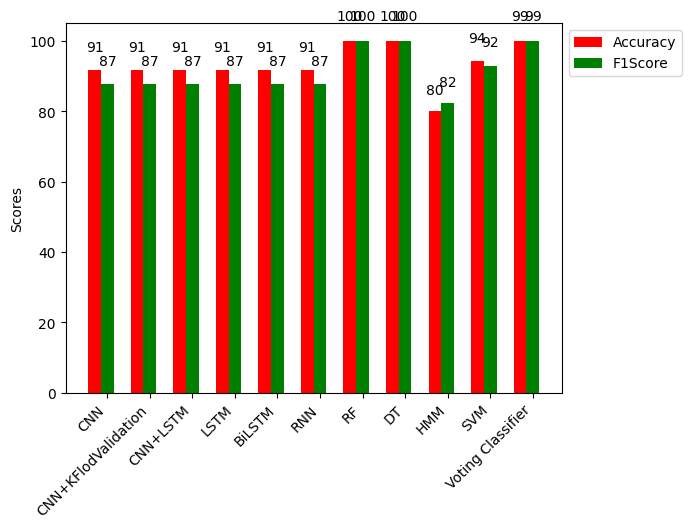

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 11
ind = np.arange(N)  # the x locations for the groups
width = 0.3      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
yvals = [cnn*100,cnnkv*100,hyd*100,lstm*100,bilstm*100,rnn*100,val1,val2,val3,val4,val5]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [f1cnn*100,f1cnnkv*100,f1hyd*100,f1lstm*100,f1bilstm*100,f1rnn*100,f1rf*100,f1dt*100,f1hmm*100,f1svm*100,f1vot*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('CNN','CNN+KFlodValidation','CNN+LSTM','LSTM','BiLSTM','RNN','RF','DT','HMM','SVM','Voting Classifier'), rotation=45, ha="right")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Move the legend outside the plot
ax.legend( (rects1[0], rects2[0]), ('Accuracy', 'F1Score'), loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
score = [cnn*100,cnnkv*100,hyd*100,lstm*100,bilstm*100,rnn*100,val1,val2,val3,val4,val5]

In [ ]:
#make variabel for save the result and to show it
classifier = ('CNN','CNN+KFlodValidation','CNN+LSTM','LSTM','BiLSTM','RNN','RF','DT','HMM','SVM','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[ 0  1  2  3  4  5  6  7  8  9 10]
[91.72, 91.72, 91.72, 91.72, 91.72, 91.72, 100.0, 100.0, 80.035, 94.135, 99.945]


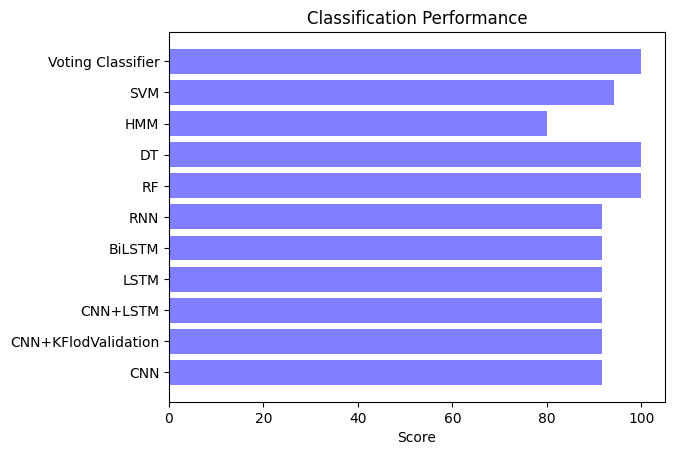

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']